In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

First, let's look at the qubit connectivity of FakeTokyo. This is shown in Figure 2 of https://arxiv.org/pdf/1903.10963.pdf. In what follows, we pick qubits 5, 11, 12, and 8 to be our code qubits and 10, 6, 7, and 13 to be the syndrome qubits. Qubits 11 and 12 have errors applied to them, which we want to identify. We can identify these errors by measuring the following operators:
$$S_{10} = X_5 X_{11}$$
$$S_6 = Z_5 Z_{11}$$
$$S_7 = X_{12} X_8$$
$$S_{13} = Z_{12} Z_8.$$
For example, if qubit 11 has an X applied to it, then the measured value of $S_6$ will be negated. Similarly, if qubit 11 has a Z applied to it, then the measured value of $S_{10}$ will be negated. It is possible to measure all of these operators simultaneously because they all mutually commute. 

Our initial state should be an eigenstate of the syndrome operators. A product of two Bell states, one between qubits 5 and 11 and the other between qubits 12 and 8 is such a state, so we pick this as our initial state.

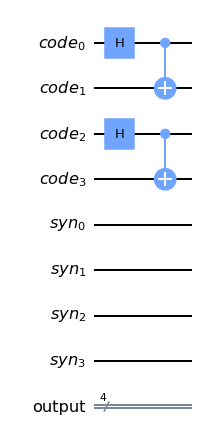

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

code = QuantumRegister(4,'code')
syn = QuantumRegister(4,'syn')
out = ClassicalRegister(4,'output')


# initialize

qc_init = QuantumCircuit(code,syn,out)
# create bell pairs on the two pairs of code qubits.
qc_init.h(code[0])
qc_init.cx(code[0],code[1])

qc_init.h(code[2])
qc_init.cx(code[2],code[3])


qc_init.draw()

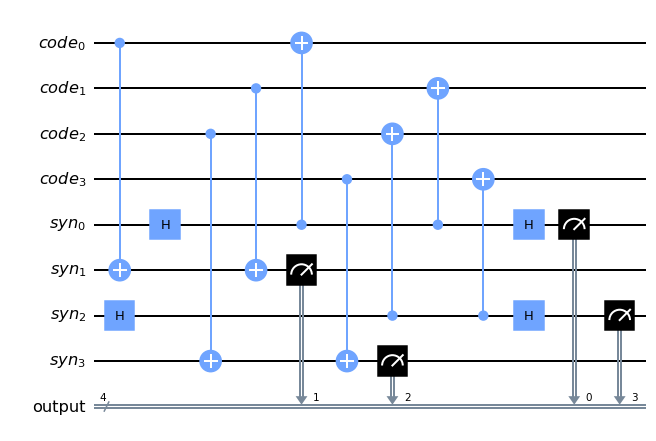

In [2]:
# set error_qubits and layout
error_qubits = [1,2]
initial_layout = [5,11,12,8, 10,6,7,13]

# check for errors:

qc_syn = QuantumCircuit(code,syn,out)

# measure s6 = Z5 Z11
qc_syn.cx(code[0],syn[1])
qc_syn.cx(code[1],syn[1])
qc_syn.measure(syn[1],out[1])

# measure s10 = X5 X11
qc_syn.h(syn[0])
qc_syn.cx(syn[0],code[0])
qc_syn.cx(syn[0],code[1])
qc_syn.h(syn[0])
qc_syn.measure(syn[0],out[0])


# measure s13 = Z12 Z8
qc_syn.cx(code[2],syn[3])
qc_syn.cx(code[3],syn[3])
qc_syn.measure(syn[3],out[2])

# measure s7 = X12 X8
qc_syn.h(syn[2])
qc_syn.cx(syn[2],code[2])
qc_syn.cx(syn[2],code[3])
qc_syn.h(syn[2])
qc_syn.measure(syn[2],out[3])


qc_syn.draw()

In [3]:
from qc_grader import grade_ex3
grade_ex3(qc_init,qc_syn,error_qubits,initial_layout)

Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 106.
Feel free to submit your answer.

